In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

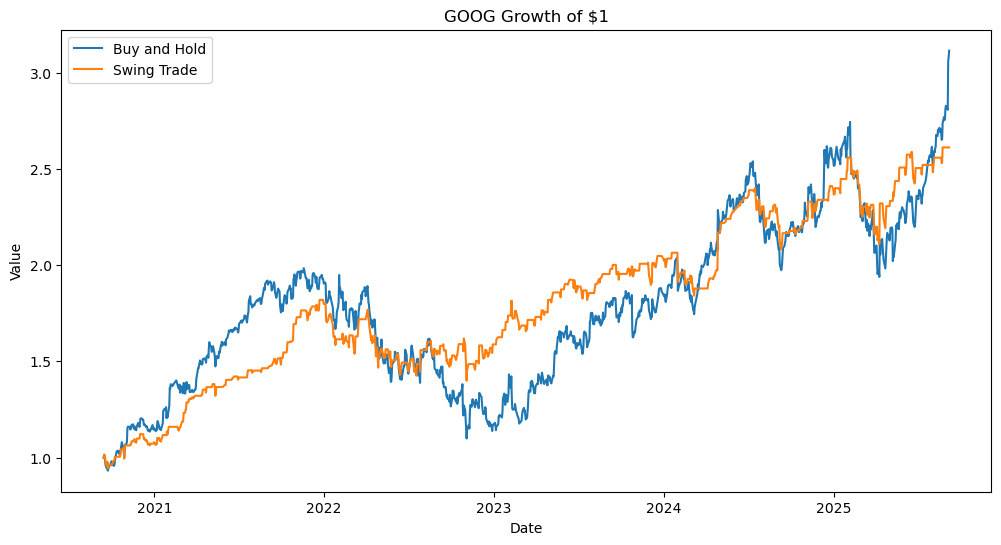

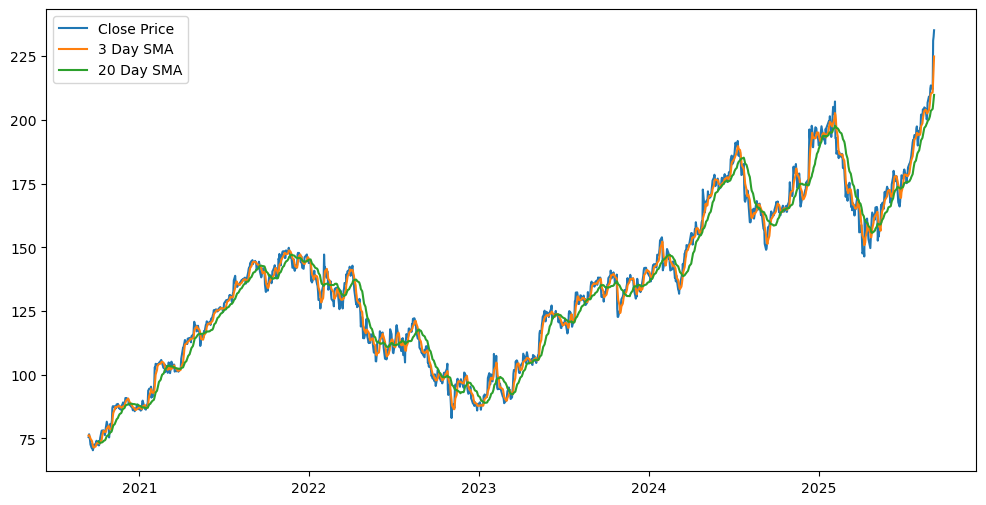

Date
2025-08-22 00:00:00-04:00    2.611794
2025-08-25 00:00:00-04:00    2.611794
2025-08-26 00:00:00-04:00    2.611794
2025-08-27 00:00:00-04:00    2.611794
2025-08-28 00:00:00-04:00    2.611794
2025-08-29 00:00:00-04:00    2.611794
2025-09-02 00:00:00-04:00    2.611794
2025-09-03 00:00:00-04:00    2.611794
2025-09-04 00:00:00-04:00    2.611794
2025-09-05 00:00:00-04:00    2.611794
Name: Strat_Cum, dtype: float64

In [ ]:
TICKER = "GOOG"
PERIOD = "5y"
INTERVAL = "1d"
GOOG = yf.Ticker(TICKER)
GOOG_PRICES = GOOG.history(period="5y", interval="1d")
GOOG_PRICES["3ma"] = GOOG_PRICES["Close"].rolling(5).mean()
GOOG_PRICES["20ma"] = GOOG_PRICES["Close"].rolling(20).mean()
GOOG_PRICES = GOOG_PRICES.dropna(subset=["3ma"]).copy()
signal_today = (GOOG_PRICES["Close"] < GOOG_PRICES["3ma"]).astype(int)
GOOG_PRICES["Position"] = signal_today.shift(1).fillna(0)
GOOG_PRICES["Return"] = GOOG_PRICES["Close"].pct_change().fillna(0)
GOOG_PRICES["Strat_Ret"] = GOOG_PRICES["Return"] * GOOG_PRICES["Position"]
GOOG_PRICES["Market_Cum"] = (1 + GOOG_PRICES["Return"]).cumprod()
GOOG_PRICES["Strat_Cum"] = (1 + GOOG_PRICES["Strat_Ret"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Market_Cum"], label="Buy and Hold")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Strat_Cum"], label="Swing Trade")
plt.title("GOOG Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Close"], label="Close Price")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["3ma"], label="3 Day SMA")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["20ma"], label="20 Day SMA")
plt.legend()
plt.show()
GOOG_PRICES["Strat_Cum"].tail(10)

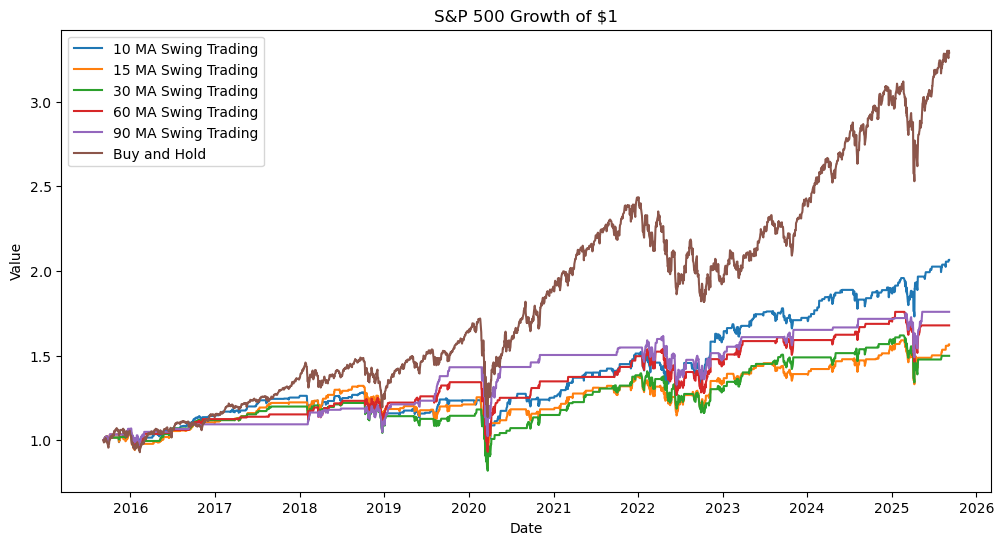

In [133]:
SP500 = yf.Ticker("^GSPC")
sp_prices = pd.DataFrame(SP500.history(period="10y", interval="1d"))
plt.figure(figsize=(12, 6))
sp_prices["5ma"] = sp_prices["Close"].ewm(span=5, adjust=False).mean()

for i in (10, 15, 30, 60, 90):
    sp_prices_iteration = sp_prices.copy()
    sp_prices_iteration["long_ma"] = sp_prices_iteration["Close"].ewm(
        span=i, adjust=False).mean()
    sp_prices_iteration = sp_prices_iteration.dropna(subset=["5ma", "long_ma"])
    signal_buy = (sp_prices_iteration["Close"] <
                  sp_prices_iteration["long_ma"]).astype(int)
    sp_prices_iteration["strat_ret"] = (
        1 + sp_prices_iteration["Close"].pct_change().fillna(0) * signal_buy.shift(1).fillna(0)).cumprod()
    plt.plot(sp_prices_iteration.index,
             sp_prices_iteration["strat_ret"], label=f"{i} MA Swing Trading")
sp_prices["mkt_ret"] = (1+sp_prices["Close"].pct_change().fillna(0)).cumprod()

plt.title("S&P 500 Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.plot(sp_prices.index, sp_prices["mkt_ret"], label="Buy and Hold")
plt.legend()
plt.show()